<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap02a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題演習

メディアンフィルタを実装せよ。




準備

In [1]:
# サンプル画像を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg

--2023-05-24 07:50:04--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg [following]
--2023-05-24 07:50:04--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1750 (1.7K) [image/jpeg]
Saving to: ‘sample1.jpg.2’

sample1.jpg.2       100%[===================>]   1.71K  --.-KB/s    in 0s      

2023-05-24 07:50:04 (29.7 MB/s) - ‘sample1

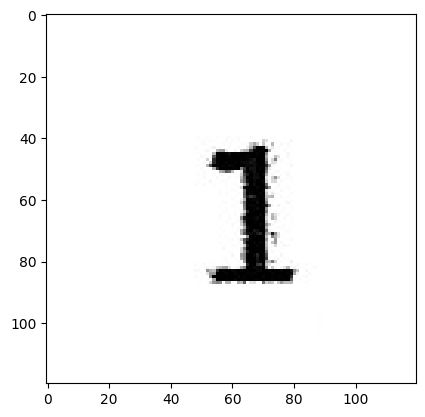

In [2]:
import numpy as np
import matplotlib.pyplot as plt

imagefile = 'sample1.jpg'
im = plt.imread(imagefile)
(h, w) = im.shape
plt.imshow(im)
plt.gray()

メディアンフィルタ

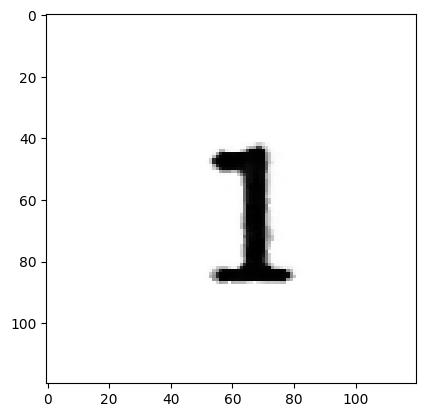

In [3]:
# メディアンフィルタ (5x5)
im3 = np.full_like(im, 255)

for y in range(2,h-2):
  for x in range(2,w-2):
    im3[x,y] = np.median(im[x-2:x+3, y-2:y+3])

plt.imshow(im3)
plt.gray()

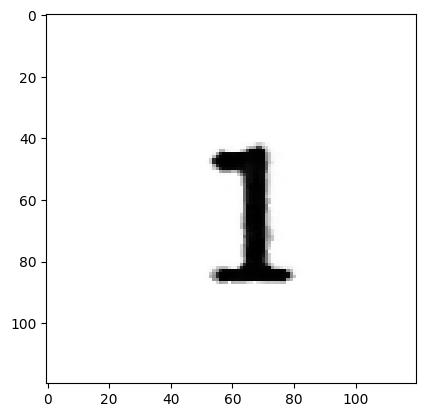

In [4]:
# 別解
from scipy.ndimage import median_filter

plt.imshow(median_filter(im, size=5))
plt.gray()

（応用問題）上記処理に加えて、ストライドを2にして画像圧縮を行え。

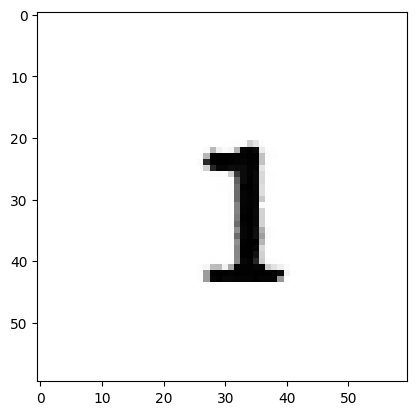

In [5]:
# メディアンフィルタ (5x5)
# scipy.ndimage の median_filter では stride が指定できない
s = 2 # stride
im4 = np.full((h//s, w//s), 255)

for y in range(2,h-2,s):
  for x in range(2,w-2,s):
    im4[x//s,y//s] = np.median(im[x-2:x+3, y-2:y+3])

plt.imshow(im4)
plt.gray()

Sobelフィルタを実装せよ

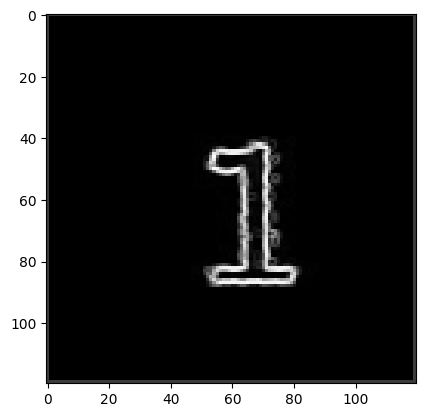

In [6]:
# Sobelフィルタ

filter2x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
filter2y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=np.float32)
im5 = np.full_like(im, 255, np.float32)

for y in range(1,h-1):
  for x in range(1,w-1):
    t = im[x-1:x+2, y-1:y+2]
    im5[x,y] = np.sqrt(np.sum(t * filter2x)**2 + np.sum(t * filter2y)**2)

plt.imshow(im5)
plt.gray()